##Exploring DC Images Metadata

In [154]:
#importing the necessary packages
import requests
import csv
from PIL import Image
from io import BytesIO
import os
import os.path
import uuid
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [156]:
#assigns file path for the image data
image_data = "metadata.csv"

In [157]:
df = pd.read_csv(image_data, header = 0)
df.head(10)

,Call_number,Contributors,Date_text,Date,Digitized,Set,Genre,Id,IIIF_manifest,Preview_url,...,Location_Osm_url,Location_Latitude,Location_Longitude,Location_County,Location_State_district,Location_State,Location_Country,METSXML Record,Other_title,MODSXML Record
0,"LOT 14043-2, no. 1060 [P&P]","Lenthall, H. (Henry), 1820-1897, photographer....","[ca. 1856, printed between 1862 and 1877]",1862,True,Nurses-And-Nursing,Albumen prints--1860-1880 | Cartes de visite--...,http://www.loc.gov/item/2018653939/,http://www.loc.gov/item/2018653939/manifest.json,https://tile.loc.gov/storage-services/service/...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,LC-USF34- 046569-E [P&P] LOT 1548 (correspondi...,"Delano, Jack, 1914-1997, photographer.",1941 Oct.,1941,True,Nurses-And-Nursing,Nitrate negatives,http://www.loc.gov/item/2017796981/,http://www.loc.gov/item/2017796981/manifest.json,https://tile.loc.gov/storage-services/service/...,...,https://www.openstreetmap.org/relation/1800720...,39.3573664 | 33.5492988 | 41.6809707 | 39.7837304,-90.3898985 | -83.1660939 | 44.0287382 | -100....,Greene County | Greene County | Unknown | Unknown,Unknown | Unknown | Unknown | Unknown,Illinois | Georgia | Unknown | Unknown,United States | United States | Georgia | Unit...,NaN,NaN,NaN
2,LC-A6195- 519-Ax [P&P],Unknown,1919 [date published],1919,True,Nurses-And-Nursing,Glass negatives,http://www.loc.gov/item/2017667969/,http://www.loc.gov/item/2017667969/manifest.json,https://tile.loc.gov/storage-services/service/...,...,https://www.openstreetmap.org/relation/365331,42.6384261,12.674297,Unknown,Unknown,Unknown,Italy,NaN,NaN,NaN
3,"POS - WWI - US, no. 120 (C size) [P&P]","Grant, Gordon, 1875-1962, artist.",[between 1914 and 1918],1914,True,Nurses-And-Nursing,NaN,http://www.loc.gov/item/00652153/,http://www.loc.gov/item/00652153/manifest.json,https://tile.loc.gov/storage-services/service/...,...,https://www.openstreetmap.org/relation/148838,39.7837304,-100.445882,Unknown,Unknown,Unknown,United States,NaN,NaN,NaN
4,Illus. in E492.94 33d T (Case X) [P&P] Copy 2,Unknown,1902 [from a photograph taken between 1862 and...,1902,True,Nurses-And-Nursing,Portrait photographs--1900-1910 | Book illustr...,http://www.loc.gov/item/2018663038/,http://www.loc.gov/item/2018663038/manifest.json,https://tile.loc.gov/storage-services/service/...,...,https://www.openstreetmap.org/relation/148838,39.7837304,-100.445882,Unknown,Unknown,Unknown,United States,NaN,NaN,NaN
5,"LOT 14043-2, no. 697 [P&P]","Claflin, C. R. B. (Charles R. B.), 1817-1897, ...",[March 1865],1865,True,Nurses-And-Nursing,Cartes de visite--1860-1870 | Albumen prints--...,http://www.loc.gov/item/2018651854/,http://www.loc.gov/item/2018651854/manifest.json,https://tile.loc.gov/storage-services/service/...,...,https://www.openstreetmap.org/relation/148838,39.7837304,-100.445882,Unknown,Unknown,Unknown,United States,NaN,NaN,NaN
6,LC-GB05- 7114 [P&P],"Gotfryd, Bernard, photographer.",February 1984.,1984,True,Nurses-And-Nursing,Slides--Color--1980-1990,http://www.loc.gov/item/2020736655/,http://www.loc.gov/item/2020736655/manifest.json,https://tile.loc.gov/storage-services/service/...,...,https://www.openstreetmap.org/relation/61320 |...,43.1561681 | 40.7127281 | 39.7837304,-75.8449946 | -74.0060152 | -100.445882,Unknown | Unknown | Unknown,Unknown | Unknown | Unknown,New York | New York | Unknown,United States | United States | United States,NaN,NaN,NaN
7,LC-A6197- RC-853-Bx [P&P],"Underwood & Underwood, photographer.","June 24, 1917 [date received]",1917,True,Nurses-And-Nursing,Glass negatives,http://www.loc.gov/item/2017676851/,http://www.loc.gov/item/2017676851/manifest.json,https://tile.loc.gov/storage-services/service/...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,"LOT 15158-1, no. 811 [P&P]","Addis, R. W. (Robert W.), -1874, photographer.",[between 1862 and 1864],1862,True,Nurses-And-Nursing,Cartes de visite--1860-1870 | Albumen prints--...,http://www.loc.gov/item/2021630920/,http://www.loc.gov/item/202163092

In [158]:
df.columns

Index(['Call_number', 'Contributors', 'Date_text', 'Date', 'Digitized', 'Set',
       'Genre', 'Id', 'IIIF_manifest', 'Preview_url', 'Index', 'Description',
       'Creators_names', 'Creators_roles', 'Type_of_resource', 'MODS Record',
       'MARCXML Record', 'MARC Record', 'Dublin Core Record', 'Rights',
       'Source_collection', 'Language', 'Lccn', 'Medium', 'Mime_type', 'Notes',
       'Online_format', 'Original_format', 'Part_of', 'Repository',
       'Number_of_files', 'Shelf_id', 'Subjects', 'Subject_headings',
       'Last_updated_in_api', 'Title', 'Url', 'Location_text',
       'Location_Short_name', 'Location_Full_name', 'Location_Osm_url',
       'Location_Latitude', 'Location_Longitude', 'Location_County',
       'Location_State_district', 'Location_State', 'Location_Country',
       'METSXML Record', 'Other_title', 'MODSXML Record'],
      dtype='object')

In [159]:
df_dc_set = df[df['Subjects'].str.contains('d.c') == True]
df_dc_set.shape
df_dc_set.head(10)

,Call_number,Contributors,Date_text,Date,Digitized,Set,Genre,Id,IIIF_manifest,Preview_url,...,Location_Osm_url,Location_Latitude,Location_Longitude,Location_County,Location_State_district,Location_State,Location_Country,METSXML Record,Other_title,MODSXML Record
2,LC-A6195- 519-Ax [P&P],Unknown,1919 [date published],1919,True,Nurses-And-Nursing,Glass negatives,http://www.loc.gov/item/2017667969/,http://www.loc.gov/item/2017667969/manifest.json,https://tile.loc.gov/storage-services/service/...,...,https://www.openstreetmap.org/relation/365331,42.6384261,12.674297,Unknown,Unknown,Unknown,Italy,NaN,NaN,NaN
3,"POS - WWI - US, no. 120 (C size) [P&P]","Grant, Gordon, 1875-1962, artist.",[between 1914 and 1918],1914,True,Nurses-And-Nursing,NaN,http://www.loc.gov/item/00652153/,http://www.loc.gov/item/00652153/manifest.json,https://tile.loc.gov/storage-services/service/...,...,https://www.openstreetmap.org/relation/148838,39.7837304,-100.445882,Unknown,Unknown,Unknown,United States,NaN,NaN,NaN
5,"LOT 14043-2, no. 697 [P&P]","Claflin, C. R. B. (Charles R. B.), 1817-1897, ...",[March 1865],1865,True,Nurses-And-Nursing,Cartes de visite--1860-1870 | Albumen prints--...,http://www.loc.gov/item/2018651854/,http://www.loc.gov/item/2018651854/manifest.json,https://tile.loc.gov/storage-services/service/...,...,https://www.openstreetmap.org/relation/148838,39.7837304,-100.445882,Unknown,Unknown,Unknown,United States,NaN,NaN,NaN
7,LC-A6197- RC-853-Bx [P&P],"Underwood & Underwood, photographer.","June 24, 1917 [date received]",1917,True,Nurses-And-Nursing,Glass negatives,http://www.loc.gov/item/2017676851/,http://www.loc.gov/item/2017676851/manifest.json,https://tile.loc.gov/storage-services/service/...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,"LOT 15158-1, no. 811 [P&P]","Addis, R. W. (Robert W.), -1874, photographer.",[between 1862 and 1864],1862,True,Nurses-And-Nursing,Cartes de visite--1860-1870 | Albumen prints--...,http://www.loc.gov/item/2021630920/,http://www.loc.gov/item/2021630920/manifest.json,https://tile.loc.gov/storage-services/service/...,...,https://www.openstreetmap.org/relation/148838,39.7837304,-100.445882,Unknown,Unknown,Unknown,United States,NaN,NaN,NaN
11,LC-A6196- 5059 [P&P],Unknown,July 1918.,1918,True,Nurses-And-Nursing,Glass negatives,http://www.loc.gov/item/2017673878/,http://www.loc.gov/item/2017673878/manifest.json,https://tile.loc.gov/storage-services/service/...,...,https://www.openstreetmap.org/relation/148838 ...,39.7837304 | 40.0796606 | 41.8755616,-100.445882 | -89.4337288 | -87.6244212,Unknown | Unknown | Cook County,Unknown | Unknown | Unknown,Unknown | Illinois | Illinois,United States | United States | United States,NaN,NaN,NaN
13,LC-A6196- 8895 [P&P],Unknown,[ca. 1918],1918,True,Nurses-And-Nursing,Glass negatives,http://www.loc.gov/item/2017675368/,http://www.loc.gov/item/2017675368/manifest.json,https://tile.loc.gov/storage-services/service/...,...,https://www.openstreetmap.org/relation/58274 |...,50.8465573 | 50.6402809,4.351697 | 4.6667145,Brussels-Capital | Unknown,Unknown | Unknown,Unknown | Unknown,Belgium | Belgium,NaN,NaN,NaN
14,LC-U9- 23723-23 [P&P],"Leffler, Warren K., photographer.",1971 Jan. 5.,1971,True,Nurses-And-Nursing,NaN,http://www.loc.gov/item/2012647959/,http://www.loc.gov/item/2012647959/manifest.json,https://tile.loc.gov/storage-services/service/...,...,https://www.openstreetmap.org/relation/5396194,38.8950368,-77.0365427,Unknown,Unknown,District of Columbia,United States,NaN,NaN,NaN
15,"LOT 14043-2, no. 1308 [P&P]",Unknown,Aug. 1865,1865,True,Nurses-And-Nursing,Stereographs--1860-1870 | Albumen prints--1860...,http://www.loc.gov/item/2019630777/,http://www.loc.gov/item/2019630777/manifest.json,https://tile.loc.gov/storage-services/service/...,...,https://www.openstreetmap.org/relation/148838 ...,39.7837304 | 38.8950368,-100.445882 | -77.0365427,Unknown | Unknown,Unknown | Unknown,Unknown | District of Columbia,United States | United States,NaN,NaN,NaN
16,"LOT 3372, no. 93","Underw

In [160]:
df_dc_set.columns

Index(['Call_number', 'Contributors', 'Date_text', 'Date', 'Digitized', 'Set',
       'Genre', 'Id', 'IIIF_manifest', 'Preview_url', 'Index', 'Description',
       'Creators_names', 'Creators_roles', 'Type_of_resource', 'MODS Record',
       'MARCXML Record', 'MARC Record', 'Dublin Core Record', 'Rights',
       'Source_collection', 'Language', 'Lccn', 'Medium', 'Mime_type', 'Notes',
       'Online_format', 'Original_format', 'Part_of', 'Repository',
       'Number_of_files', 'Shelf_id', 'Subjects', 'Subject_headings',
       'Last_updated_in_api', 'Title', 'Url', 'Location_text',
       'Location_Short_name', 'Location_Full_name', 'Location_Osm_url',
       'Location_Latitude', 'Location_Longitude', 'Location_County',
       'Location_State_district', 'Location_State', 'Location_Country',
       'METSXML Record', 'Other_title', 'MODSXML Record'],
      dtype='object')

In [161]:
df_dc_set.drop('Call_number', axis = 1, inplace = True)
df_dc_set.drop('Date_text', axis = 1, inplace = True) #
df_dc_set.drop('Digitized', axis = 1, inplace = True)
df_dc_set.drop('IIIF_manifest', axis = 1, inplace = True)
df_dc_set.drop('Preview_url', axis = 1, inplace = True)
df_dc_set.drop('Index', axis = 1, inplace = True)
df_dc_set.drop('MODS Record', axis = 1, inplace = True)
df_dc_set.drop('MARCXML Record', axis = 1, inplace = True)
df_dc_set.drop('MARC Record', axis = 1, inplace = True)
df_dc_set.drop('Dublin Core Record', axis = 1, inplace = True)
df_dc_set.drop('Rights', axis = 1, inplace = True)
df_dc_set.drop('Mime_type', axis = 1, inplace = True) #
df_dc_set.drop('Shelf_id', axis = 1, inplace = True)
df_dc_set.drop('Last_updated_in_api', axis = 1, inplace = True)
df_dc_set.drop('METSXML Record', axis = 1, inplace = True)
df_dc_set.drop('Other_title', axis = 1, inplace = True)
df_dc_set.drop('MODSXML Record', axis = 1, inplace = True)

/var/folders/w8/9v66x3vn63vbyr9s90tdpbn80000gn/T/ipykernel_64962/2636867340.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dc_set.drop('Call_number', axis = 1, inplace = True)
/var/folders/w8/9v66x3vn63vbyr9s90tdpbn80000gn/T/ipykernel_64962/2636867340.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dc_set.drop('Date_text', axis = 1, inplace = True) #
/var/folders/w8/9v66x3vn63vbyr9s90tdpbn80000gn/T/ipykernel_64962/2636867340.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/u

In [162]:
df_dc_set.columns

Index(['Contributors', 'Date', 'Set', 'Genre', 'Id', 'Description',
       'Creators_names', 'Creators_roles', 'Type_of_resource',
       'Source_collection', 'Language', 'Lccn', 'Medium', 'Notes',
       'Online_format', 'Original_format', 'Part_of', 'Repository',
       'Number_of_files', 'Subjects', 'Subject_headings', 'Title', 'Url',
       'Location_text', 'Location_Short_name', 'Location_Full_name',
       'Location_Osm_url', 'Location_Latitude', 'Location_Longitude',
       'Location_County', 'Location_State_district', 'Location_State',
       'Location_Country'],
      dtype='object')

In [163]:
df_dc_set.head(10)

,Contributors,Date,Set,Genre,Id,Description,Creators_names,Creators_roles,Type_of_resource,Source_collection,...,Location_text,Location_Short_name,Location_Full_name,Location_Osm_url,Location_Latitude,Location_Longitude,Location_County,Location_State_district,Location_State,Location_Country
2,Unknown,1919,Nurses-And-Nursing,Glass negatives,http://www.loc.gov/item/2017667969/,NaN,NaN,NaN,Still image,American National Red Cross photograph collect...,...,Italy,Italy,Italy,https://www.openstreetmap.org/relation/365331,42.6384261,12.674297,Unknown,Unknown,Unknown,Italy
3,"Grant, Gordon, 1875-1962, artist.",1914,Nurses-And-Nursing,NaN,http://www.loc.gov/item/00652153/,American Red Cross membership drive poster sho...,"Grant, Gordon, 1875-1962",artist,Still image,NaN,...,United States,United States,United States,https://www.openstreetmap.org/relation/148838,39.7837304,-100.445882,Unknown,Unknown,Unknown,United States
5,"Claflin, C. R. B. (Charles R. B.), 1817-1897, ...",1865,Nurses-And-Nursing,Cartes de visite--1860-1870 | Albumen prints--...,http://www.loc.gov/item/2018651854/,NaN,"Claflin, C. R. B. (Charles R. B.), 1817-1897",photographer,Still image,Liljenquist Family collection (Library of Cong...,...,United States,United States,United States,https://www.openstreetmap.org/relation/148838,39.7837304,-100.445882,Unknown,Unknown,Unknown,United States
7,"Underwood & Underwood, photographer.",1917,Nurses-And-Nursing,Glass negatives,http://www.loc.gov/item/2017676851/,NaN,Underwood & Underwood,photographer,Still image,American National Red Cross photograph collect...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,"Addis, R. W. (Robert W.), -1874, photographer.",1862,Nurses-And-Nursing,Cartes de visite--1860-1870 | Albumen prints--...,http://www.loc.gov/item/2021630920/,"Photograph shows portrait of Mary Tepe, also k...","Addis, R. W. (Robert W.), -1874",photographer,Still image,Liljenquist Family collection (Library of Cong...,...,United States,United States,United States,https://www.openstreetmap.org/relation/148838,39.7837304,-100.445882,Unknown,Unknown,Unknown,United States
11,Unknown,1918,Nurses-And-Nursing,Glass negatives,http://www.loc.gov/item/2017673878/,NaN,NaN,NaN,Still image,American National Red Cross photograph collect...,...,Illinois | Chicago | United States | Illinois-...,United States | Illinois | Chicago,"United States | Illinois, United States | Chic...",https://www.openstreetmap.org/relation/148838 ...,39.7837304 | 40.0796606 | 41.8755616,-100.445882 | -89.4337288 | -87.6244212,Unknown | Unknown | Cook County,Unknown | Unknown | Unknown,Unknown | Illinois | Illinois,United States | United States | United States
13,Unknown,1918,Nurses-And-Nursing,Glass negatives,http://www.loc.gov/item/2017675368/,NaN,NaN,NaN,Still image,American National Red Cross photograph collect...,...,Belgium | Belgium--Brussels | Brussels,Brussels | Belgium,"Brussels, Brussels-Capital, Belgium | Belgium",https://www.openstreetmap.org/relation/58274 |...,50.8465573 | 50.6402809,4.351697 | 4.6667145,Brussels-Capital | Unknown,Unknown | Unknown,Unknown | Unknown,Belgium | Belgium
14,"Leffler, Warren K., photographer.",1971,Nurses-And-Nursing,NaN,http://www.loc.gov/item/2012647959/,NaN,"Leffler, Warren K.",photographer,Still image,NaN,...,Washington (D.C.) | Washington D.C.,Washington,"Washington, District of Columbia, United States",https://www.openstreetmap.org/relation/5396194,38.8950368,-77.0365427,Unknown,Unknown,District of Columbia,United States
15,Unknown,1865,Nurses-And-Nursing,Stereographs--1860-1870 | Albumen prints--1860...,http://www.loc.gov/item/2019630777/,"Photograph shows Dorothea L. Dix, Superintende...",NaN,NaN,Still image,Liljenquist Family collection (Library of Cong...,...,Washington (D.C.) | Washington D.C. | United S...,United States | Washington,"United States | Washington, District of Columb...",https://www.openstreetmap.org/relation/148838 ...,39.7837304 | 38.8950368,-100.445882 | -77.0365427,Unknown | Unknown,Unknown | U

In [164]:
df_dc_set.shape

(439, 33)

In [165]:
print("Contributors: "+ str(len(df_dc_set['Contributors'].unique())))
print("Date: " + str(len(df_dc_set['Date'].unique())))
print("Set: " + str(len(df_dc_set['Set'].unique())))
print("Creators Names: " + str(len(df_dc_set['Creators_names'].unique())))
print("Type of resource: " + str(len(df_dc_set['Type_of_resource'].unique())))
print("Source collection: " + str(len(df_dc_set['Source_collection'].unique())))
print("Language: " + str(len(df_dc_set['Language'].unique())))
print("Medium: " + str(len(df_dc_set['Medium'].unique())))
print("Part of: " + str(len(df_dc_set['Part_of'].unique())))
print("Repository: " + str(len(df_dc_set['Repository'].unique())))
print("Location: " + str(len(df_dc_set['Location_Short_name'].unique())))

Contributors: 182
Date: 198
Set: 66
Creators Names: 147
Type of resource: 10
Source collection: 67
Language: 8
Medium: 196
Part of: 153
Repository: 21
Location: 131


In [166]:
#Exploring the metadata

df_dc_set['Contributors'].unique() #-- 182 unique contributos
#chart with # of unique values for each of the selected metadata categories
#Date - needs to be cleaned
df_dc_set['Set'].unique() #word cloud with amount in each set could be a good visualization
df_dc_set['Creators_names'].unique() #drop
df_dc_set['Type_of_resource'].unique() # simple bar chart to visualize
df_dc_set['Source_collection'].unique() #Many unqiue source collections -- word cloud again could be a good choice
df_dc_set['Language'].unique() #need to combine and consolidate NA values 
df_dc_set['Medium'].unique() #need to consolidate different categories (ex. glass negatives, photos)
df_dc_set['Part_of'].unique() #messy data, would need some work to visualize effectively
df_dc_set['Repository'].unique() #need to consolidate different categories
df_dc_set['Location_Short_name'].unique() #need to organize and split into location by country and within US

array(['Italy', 'United States', nan,
       'United States | Illinois | Chicago', 'Brussels | Belgium',
       'Washington', 'United States | Washington', 'Japan',
       'Montenegro | Podgorica',
       'United States | District of Columbia | Washington',
       'United States | Vermont | East Haven | East Haven', 'Ursa Minor',
       'Arizona | Lake Havasu City | United States',
       'Ohio | United States | Oberlin', 'Ohio | Cincinnati',
       'East Carroll Parish | Transylvania | Louisiana | Transylvania | United States',
       'New York New York Hotel and Casino | New York | United States',
       'Houston | United States | Texas', 'Ohio | Cleveland',
       'United States | Seattle | Washington',
       'United States | Silver Spring | Maryland',
       'South Carolina | Charleston',
       'Denton County | United States | Texas',
       'Cook County | Illinois | Chicago | United States', 'New York',
       'Alleghany County | United States | North Carolina',
       'Richland

/var/folders/w8/9v66x3vn63vbyr9s90tdpbn80000gn/T/ipykernel_64962/2438955637.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dc_set["Date"] = df_dc_set["Date"].replace("NaN", pd.NA)


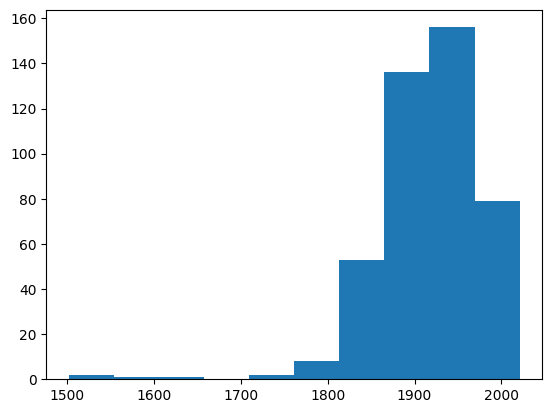

In [167]:
# Convert "NaN" strings to NaN values
df_dc_set["Date"] = df_dc_set["Date"].replace("NaN", pd.NA)
df_dc_set_adj = df_dc_set.dropna(subset=["Date"])
# Convert date strings to numeric format
for index, row in df_dc_set_adj.iterrows():
    date_str = str(row["Date"])  
    if len(date_str) == 4:
        df_dc_set_adj.at[index, "Date"] = int(date_str)  # Convert YYYY to int
    elif "-" in date_str:
        df_dc_set_adj.at[index, "Date"] = int(date_str[:4])  # Extract YYYY from YYYY-MM-DD
    else:
        # Assume last 4 characters represent year in "text text YYYY" format
        df_dc_set_adj.at[index, "Date"] = int(date_str[-4:])

df_dc_set_adj["Date"].unique()

plt.hist(df_dc_set_adj["Date"])
plt.show() 


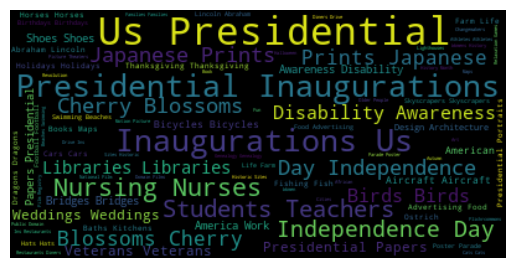

In [168]:
set_text = ""
for word in df_dc_set["Set"]:
    set_text += " " + word 
    
wordcloud = WordCloud().generate(set_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

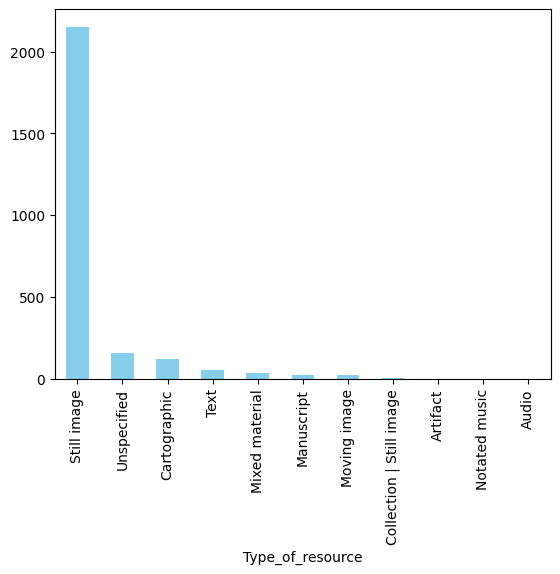

In [169]:
resource_type_counts = df['Type_of_resource'].value_counts()
resource_type_counts.plot(kind='bar', color='skyblue') 
plt.show() #over time?

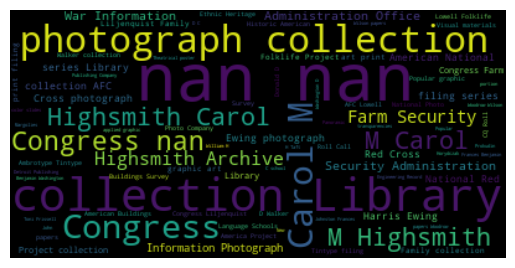

In [170]:
#word cloud for collections
collection_text = ""
for word in df_dc_set["Source_collection"]:
    collection_text += " " + str(word)
    
wordcloud = WordCloud().generate(collection_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

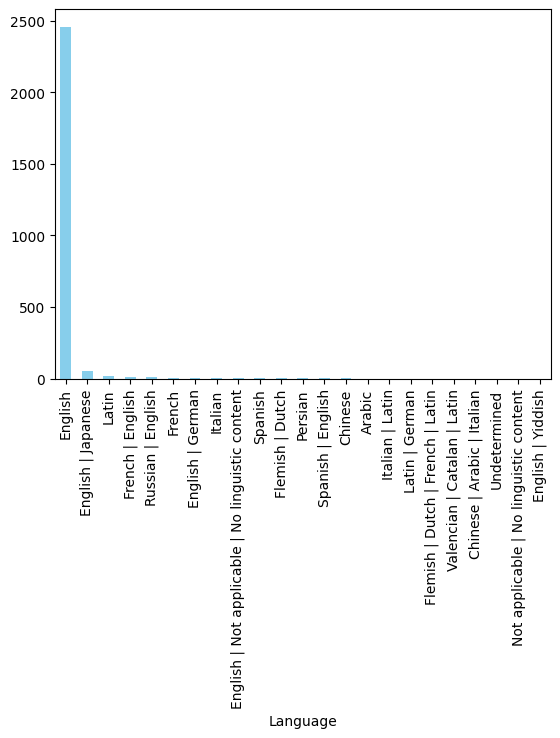

In [171]:
language_counts = df['Language'].value_counts()
language_counts.plot(kind='bar', color='skyblue') 
plt.show()

In [172]:
#Mediums

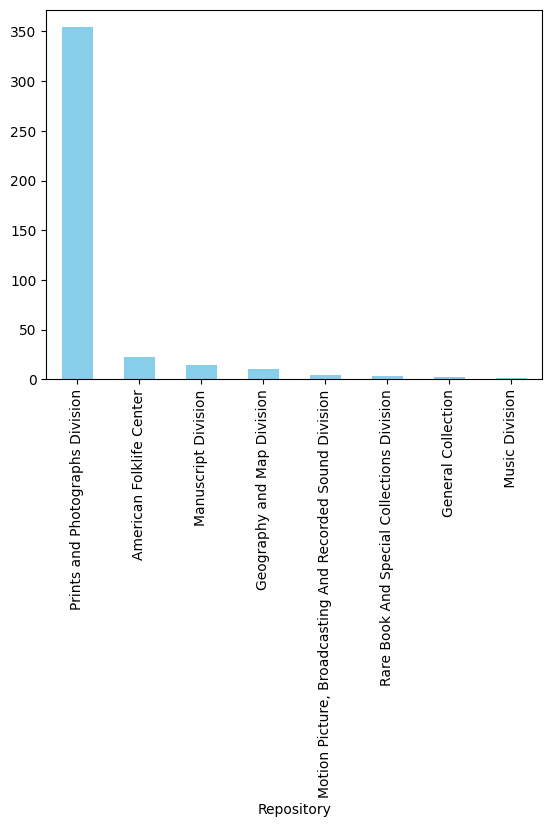

In [177]:
df_dc_set['Repository'].unique()

for index, row in df_dc_set.iterrows():
    rep_str = str(row["Repository"])  
    if "Prints and Photographs" in rep_str or "Prints & Photographs" in rep_str:
        df_dc_set.at[index, "Repository"] = "Prints and Photographs Division"
    elif "Manuscripts" in rep_str:
        df_dc_set.at[index, "Repository"] = "Manuscript Division"
    elif "Motion Picture" in rep_str:
        df_dc_set.at[index, "Repository"] = "Motion Picture, Broadcasting And Recorded Sound Division"
    elif "American Folklife Center" in rep_str:
        df_dc_set.at[index, "Repository"] = "American Folklife Center"
    elif "Rare Book" in rep_str:
        df_dc_set.at[index, "Repository"] = "Rare Book And Special Collections Division"
    elif "Geography and Map" in rep_str:
        df_dc_set.at[index, "Repository"] = "Geography and Map Division"
    elif rep_str == "Library of Congress Washington, D.C. 20540 USA":
        df_dc_set.at[index, "Repository"] = "General Collection"




rep_counts = df_dc_set['Repository'].value_counts()
rep_counts.plot(kind='bar', color='skyblue') 
plt.show()

In [178]:
#location
df_dc_set["Location_Short_name"].unique()

array(['Italy', 'United States', nan,
       'United States | Illinois | Chicago', 'Brussels | Belgium',
       'Washington', 'United States | Washington', 'Japan',
       'Montenegro | Podgorica',
       'United States | District of Columbia | Washington',
       'United States | Vermont | East Haven | East Haven', 'Ursa Minor',
       'Arizona | Lake Havasu City | United States',
       'Ohio | United States | Oberlin', 'Ohio | Cincinnati',
       'East Carroll Parish | Transylvania | Louisiana | Transylvania | United States',
       'New York New York Hotel and Casino | New York | United States',
       'Houston | United States | Texas', 'Ohio | Cleveland',
       'United States | Seattle | Washington',
       'United States | Silver Spring | Maryland',
       'South Carolina | Charleston',
       'Denton County | United States | Texas',
       'Cook County | Illinois | Chicago | United States', 'New York',
       'Alleghany County | United States | North Carolina',
       'Richland

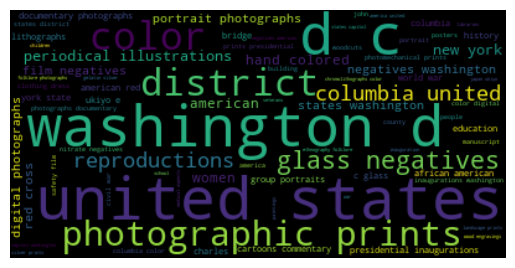

In [175]:
#subjects
df_dc_set["Subjects"]
subject_text = ""
for line in df_dc_set["Subjects"]:
    words = str(line).split(" | ")
    for word in words:
        subject_text += " " + word

wordcloud = WordCloud().generate(subject_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [176]:
subjects_list = []
for word in subject_text.split():
    if word not in subjects_list:
        subjects_list.append(word)

for subject in subjects_list:
    print(subject)


glass
negatives
american
red
cross
italy
offset
lithographs
color
membership
campaigns
public
health
service
relations
war
posters
world
united
states
medical
aspects
people
nurses
barton,
clara
history
women
portrait
photographs
union
military
cartes
de
visite
albumen
prints
civil
medals
vivandières
leonard,
marie
brose
tepe
illinois
chicago
belgium
brussels
film
washington
(d.c.)
drug
abuse
clinics
stereographs
dix,
dorothea
lynde
russo-japanese
japanese
japan
casualties
photographic
operating
rooms
montenegro
podgoritza
employment
national
district
of
columbia
nursing
recruiting
&
enlistment
association
the
mailboxes
east
haven
america
decorated
dragon
halloween
digital
vermont
magazine
covers
air
travel
periodical
illustrations
airships
cartoons
(commentary)
photomechanical
snakes
book
ursa
minor
constellations
dragons
etchings
hand-colored
astronomy
bears
london
markers
lake
havasu
city
arizona
heraldic
produce
trade
speculation
presidential
elections
(charles
frederick)
hill,
dav